      age   chol  cluster
0    63.0  233.0        3
1    67.0  286.0        2
2    67.0  229.0        3
3    37.0  250.0        3
4    41.0  204.0        0
..    ...    ...      ...
297  57.0  241.0        3
298  45.0  264.0        2
299  68.0  193.0        0
300  57.0  131.0        0
301  57.0  236.0        3

[297 rows x 3 columns]


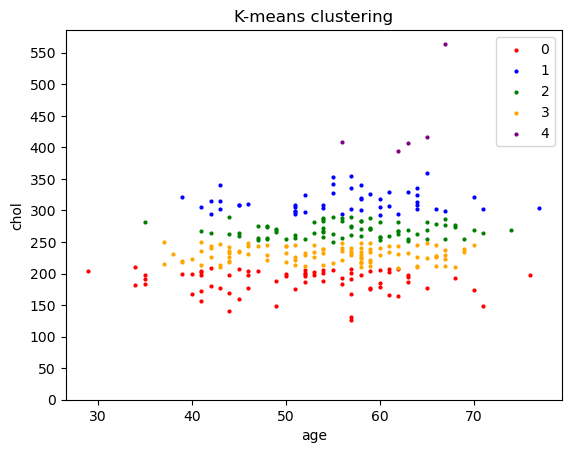

In [ ]:
#1
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('processed.cleveland.data', header=None, sep=",", na_values='?')
data = data.dropna()
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
data.columns = column_names

#df = pd.DataFrame({ column_name: data[column_name] for column_name in column_names if column_name != 'num' })

x = data['age']
y = data['chol']

df = pd.DataFrame({
   'age': data['age'],
   'chol': data['chol']
})

X = df.iloc[:,:].values

kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster'] = y_kmeans
print(df)

#X = df.loc[:, ['age', 'chol', 'cluster']].values
#print(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 4, c = 'red', label = '0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 4, c = 'blue', label = '1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 4, c = 'green', label = '2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 4, c = 'orange', label = '3')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 4, c = 'purple', label = '4')
plt.title('K-means clustering')
plt.xlabel('age')
plt.ylabel('chol')
plt.yticks(range(0, 600, 50))
plt.legend()
plt.show()


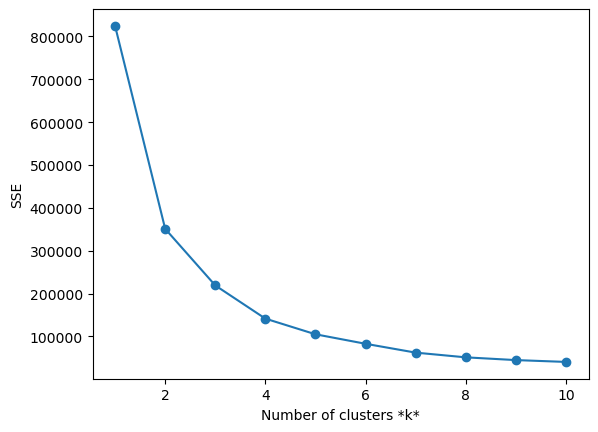

elbow: 3


In [58]:
#2
from kneed import KneeLocator

SSEs = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit_predict(X)
    SSEs.append(kmeans.inertia_)
    
plt.plot(range(1, 11), SSEs, '-o')
plt.xlabel('Number of clusters *k*')
plt.ylabel('SSE');
plt.show()

elbow = KneeLocator(range(1, 11), SSEs, curve="convex", direction="decreasing").elbow
print('elbow:', str(elbow))


      age   chol  cluster
0    63.0  233.0        2
1    67.0  286.0        2
2    67.0  229.0        2
3    37.0  250.0        2
4    41.0  204.0        0
..    ...    ...      ...
297  57.0  241.0        2
298  45.0  264.0        2
299  68.0  193.0        0
300  57.0  131.0        0
301  57.0  236.0        2

[297 rows x 3 columns]


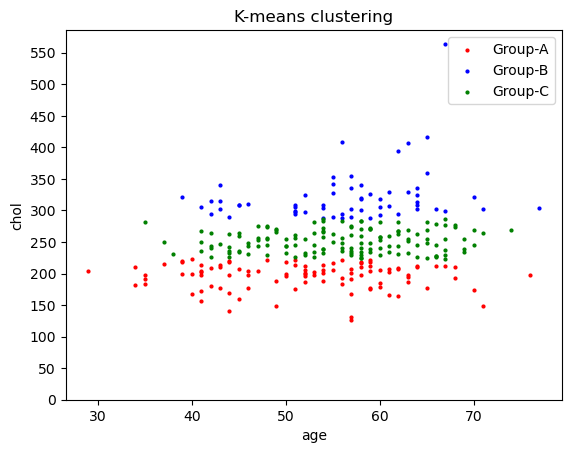

In [59]:
#3
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster'] = y_kmeans
print(df)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 4, c = 'red', label = 'Group-A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 4, c = 'blue', label = 'Group-B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 4, c = 'green', label = 'Group-C')
plt.title('K-means clustering')
plt.xlabel('age')
plt.ylabel('chol')
plt.yticks(range(0, 600, 50))
plt.legend()
plt.show()

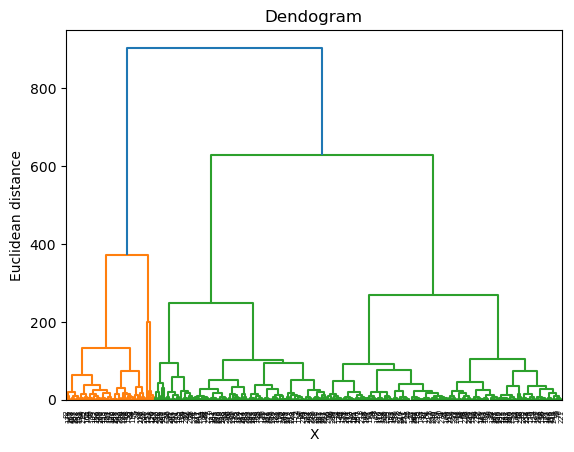

In [60]:
#4
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('X')
plt.ylabel('Euclidean distance')
plt.show()

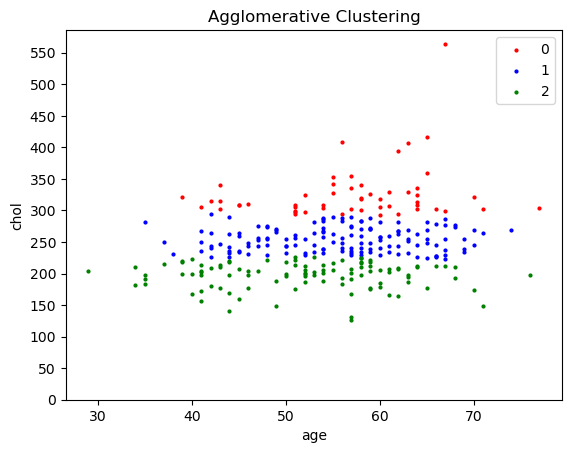

In [61]:
#5
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 4, c = 'red', label = '0')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 4, c = 'blue', label = '1')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 4, c = 'green', label = '2')
plt.title('Agglomerative Clustering')
plt.xlabel('age')
plt.ylabel('chol')
plt.yticks(range(0, 600, 50))
plt.legend()
plt.show()

In [62]:
#6
from sklearn.metrics import silhouette_score

# Silhouette score for k-means
print(f"K-means: {silhouette_score(X, y_kmeans):.3f}")

# Silhouette score for agglomerative clustering
print(f"Agglomerative: {silhouette_score(X, y_hc):.3f}")

print("K-means is better for the data set since its silhouette score is higher")

K-means: 0.472
Agglomerative: 0.468
K-means is better for the data set since its silhouette score is higher
